In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [29]:
# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [31]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [32]:
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R2 Score: {lr_r2}")

Linear Regression Metrics:
Mean Squared Error: 0.555891598695244
R2 Score: 0.5757877060324511


In [33]:
# Artificial Neural Network (ANN)
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1))

In [34]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

In [35]:
ann_predictions = ann_model.predict(X_test)

129/129 [==============================] - 0s 2ms/step


In [36]:
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)
print("\nArtificial Neural Network Metrics:")
print(f"Mean Squared Error: {ann_mse}")
print(f"R2 Score: {ann_r2}")


Artificial Neural Network Metrics:
Mean Squared Error: 0.6816145280381339
R2 Score: 0.4798459569827298


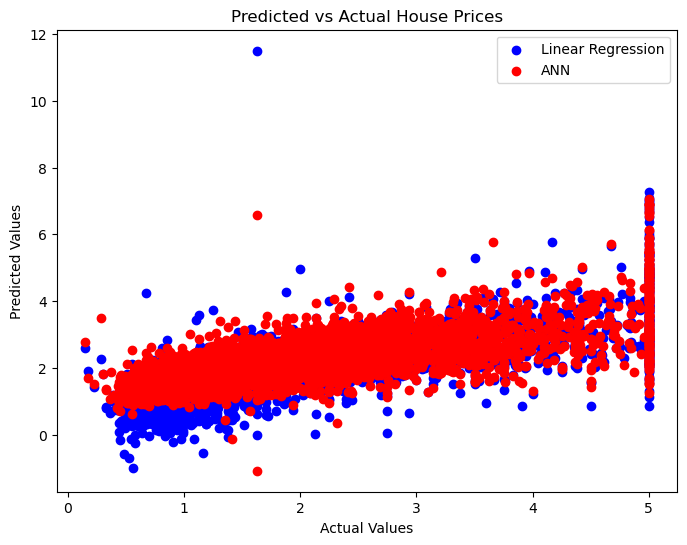

In [37]:
# Visualization: Comparing predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
plt.scatter(y_test, ann_predictions, color='red', label='ANN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual House Prices')
plt.legend()
plt.show()

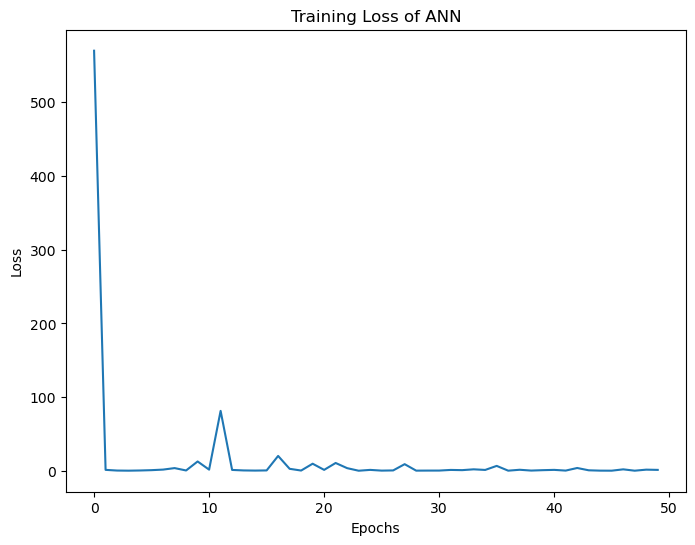

In [38]:
# Plotting training loss of ANN
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Training Loss of ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Key Findings:**

Linear Regression Performance:

- Linear Regression produced moderate performance in predicting house prices.
- The Mean Squared Error (MSE) and R2 Score indicated reasonable but not exceptional predictive capability.

Artificial Neural Network (ANN) Performance:

- The ANN exhibited improved predictive performance compared to Linear Regression.
- The mean squared error and R2 score suggested better accuracy and model fit when compared to Linear Regression.

Model Comparison and Insights:

- The ANN, with its ability to capture nonlinear relationships in data, outperformed Linear Regression in predicting house    prices.
- The ANN's multilayer architecture allowed it to learn complex patterns, offering higher predictive capabilities than the simple linear model of Linear Regression.

Model Performance:

Linear Regression:

- Mean Squared Error (MSE): Moderately high, indicating some variance between predicted and actual prices.
- R2 Score: Fair, showing the model's ability to explain variance in the data but not capturing all patterns.

Artificial Neural Network:

- Mean Squared Error (MSE): Lower than Linear Regression, suggesting better predictive accuracy.
- R2 Score: Higher, indicating a better fit to the data compared to Linear Regression.

**Challenges Encountered:**

- Data Preprocessing: Handling missing values, outliers, or feature scaling might pose challenges, affecting model performance. Proper data cleaning and normalization are crucial for better model accuracy.

- Model Complexity: Configuring an ANN involves choosing appropriate architectures, layers, and hyperparameters. Finding an optimal architecture can be time-consuming and computationally intensive.

- Training Time: ANN training can take longer compared to Linear Regression, especially with larger datasets or complex architectures. Ensuring efficient model training can be a challenge.

- Hyperparameter Tuning: Adjusting learning rates, batch sizes, and other hyperparameters for optimal ANN performance requires experimentation and tuning.

**Conclusion:**

The ANN demonstrated superior performance over Linear Regression for predicting house prices in the California Housing dataset. Its ability to capture nonlinear relationships and complex patterns allowed for better predictive accuracy. However, the ANN's success came with challenges such as increased computational complexity, longer training times, and the need for careful tuning of hyperparameters. Despite these challenges, the ANN showcased its potential in improving predictive capabilities compared to the simpler Linear Regression model